<a href="https://colab.research.google.com/github/easyhardhoon/machine_learning/blob/master/ML15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 풀링 계층

풀링 : 세로,가로 방향의 공간을 줄이는 연산

풀링의 윈도우 크기 2*2 : 2*2 영역을 원소 하나(1*1)로 집약하여 공간 크기를 줄임

최대 풀링 : 윈도우 안의 값 중 최댓값 하나를 꺼낸다

평균 풀링 : 윈도우 안의 값의 평균을 계산해 그 값을 꺼낸다

▶참고 : 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정한다

⚾풀링 계층의 특징

1. 학습해야 할 매개변수가 없다(풀링은 only 의도가 명확한 처리임)

2. 채널 수가 변하지 않는다(채널마다 독립적으로 계산하기 때문)

3. 입력의 변화에 영향을 적게 받는다(왠만해선 풀링이 변화를 흡수해버림)




In [3]:
#CNN에서 계층 사이를 흐르는 데이터는 4차원이다.
import numpy as np
x = np.random.rand(10,1,28,28)
x.shape
#여기서 x는 (10,1,28,28)의 크기에 맞는 무작위 수(by np)가 들어갑니다


(10, 1, 28, 28)

In [4]:
x[0].shape #x의 첫번째 데이터의 채널,높이,너비 shape

(1, 28, 28)

#이처럼

CNN에 흐르는 데이터는 **4차원**이다.

이 4차원 연산의 구현은 복잡하다. for문을 겹겹이 써야하는데, 이는 numpy의 특성상 쓰지 않는게 현명하다

그래서 **im2col**이라는 편의함수를 사용하는 트릭을 구현한다.

#im2col

4차원 -> 2차원. 

입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(**펼치는** 함수)

✈주의 : im2col은 단순히 **4차원 데이터를 2차원 데이터로 펼치는** 함수이다

#im2col의 특징

스트라이드가 크지 않아 필터의 적용 영역이 겹치는 일이 대부분이다

그래서 im2col로 전개한 후의 원소 수가 원래 블럭의 원소 수보다 많아질 수 있다

(각 데이터가 1개가 아니고 1.4개가 필요하다의 느낌으로 이해하면 될듯)

그래서 im2col을 쓰면 메모리를 더 많이 소비한다

하지만 컴퓨터는 행렬계산에 최적화되어 있기 때문에 im2col은 충분히 유용하다

(im2col = image to column)

#합성곱 연산의 필터 처리 상세 과정

아래 사진 참조

Mounted at /gdrive


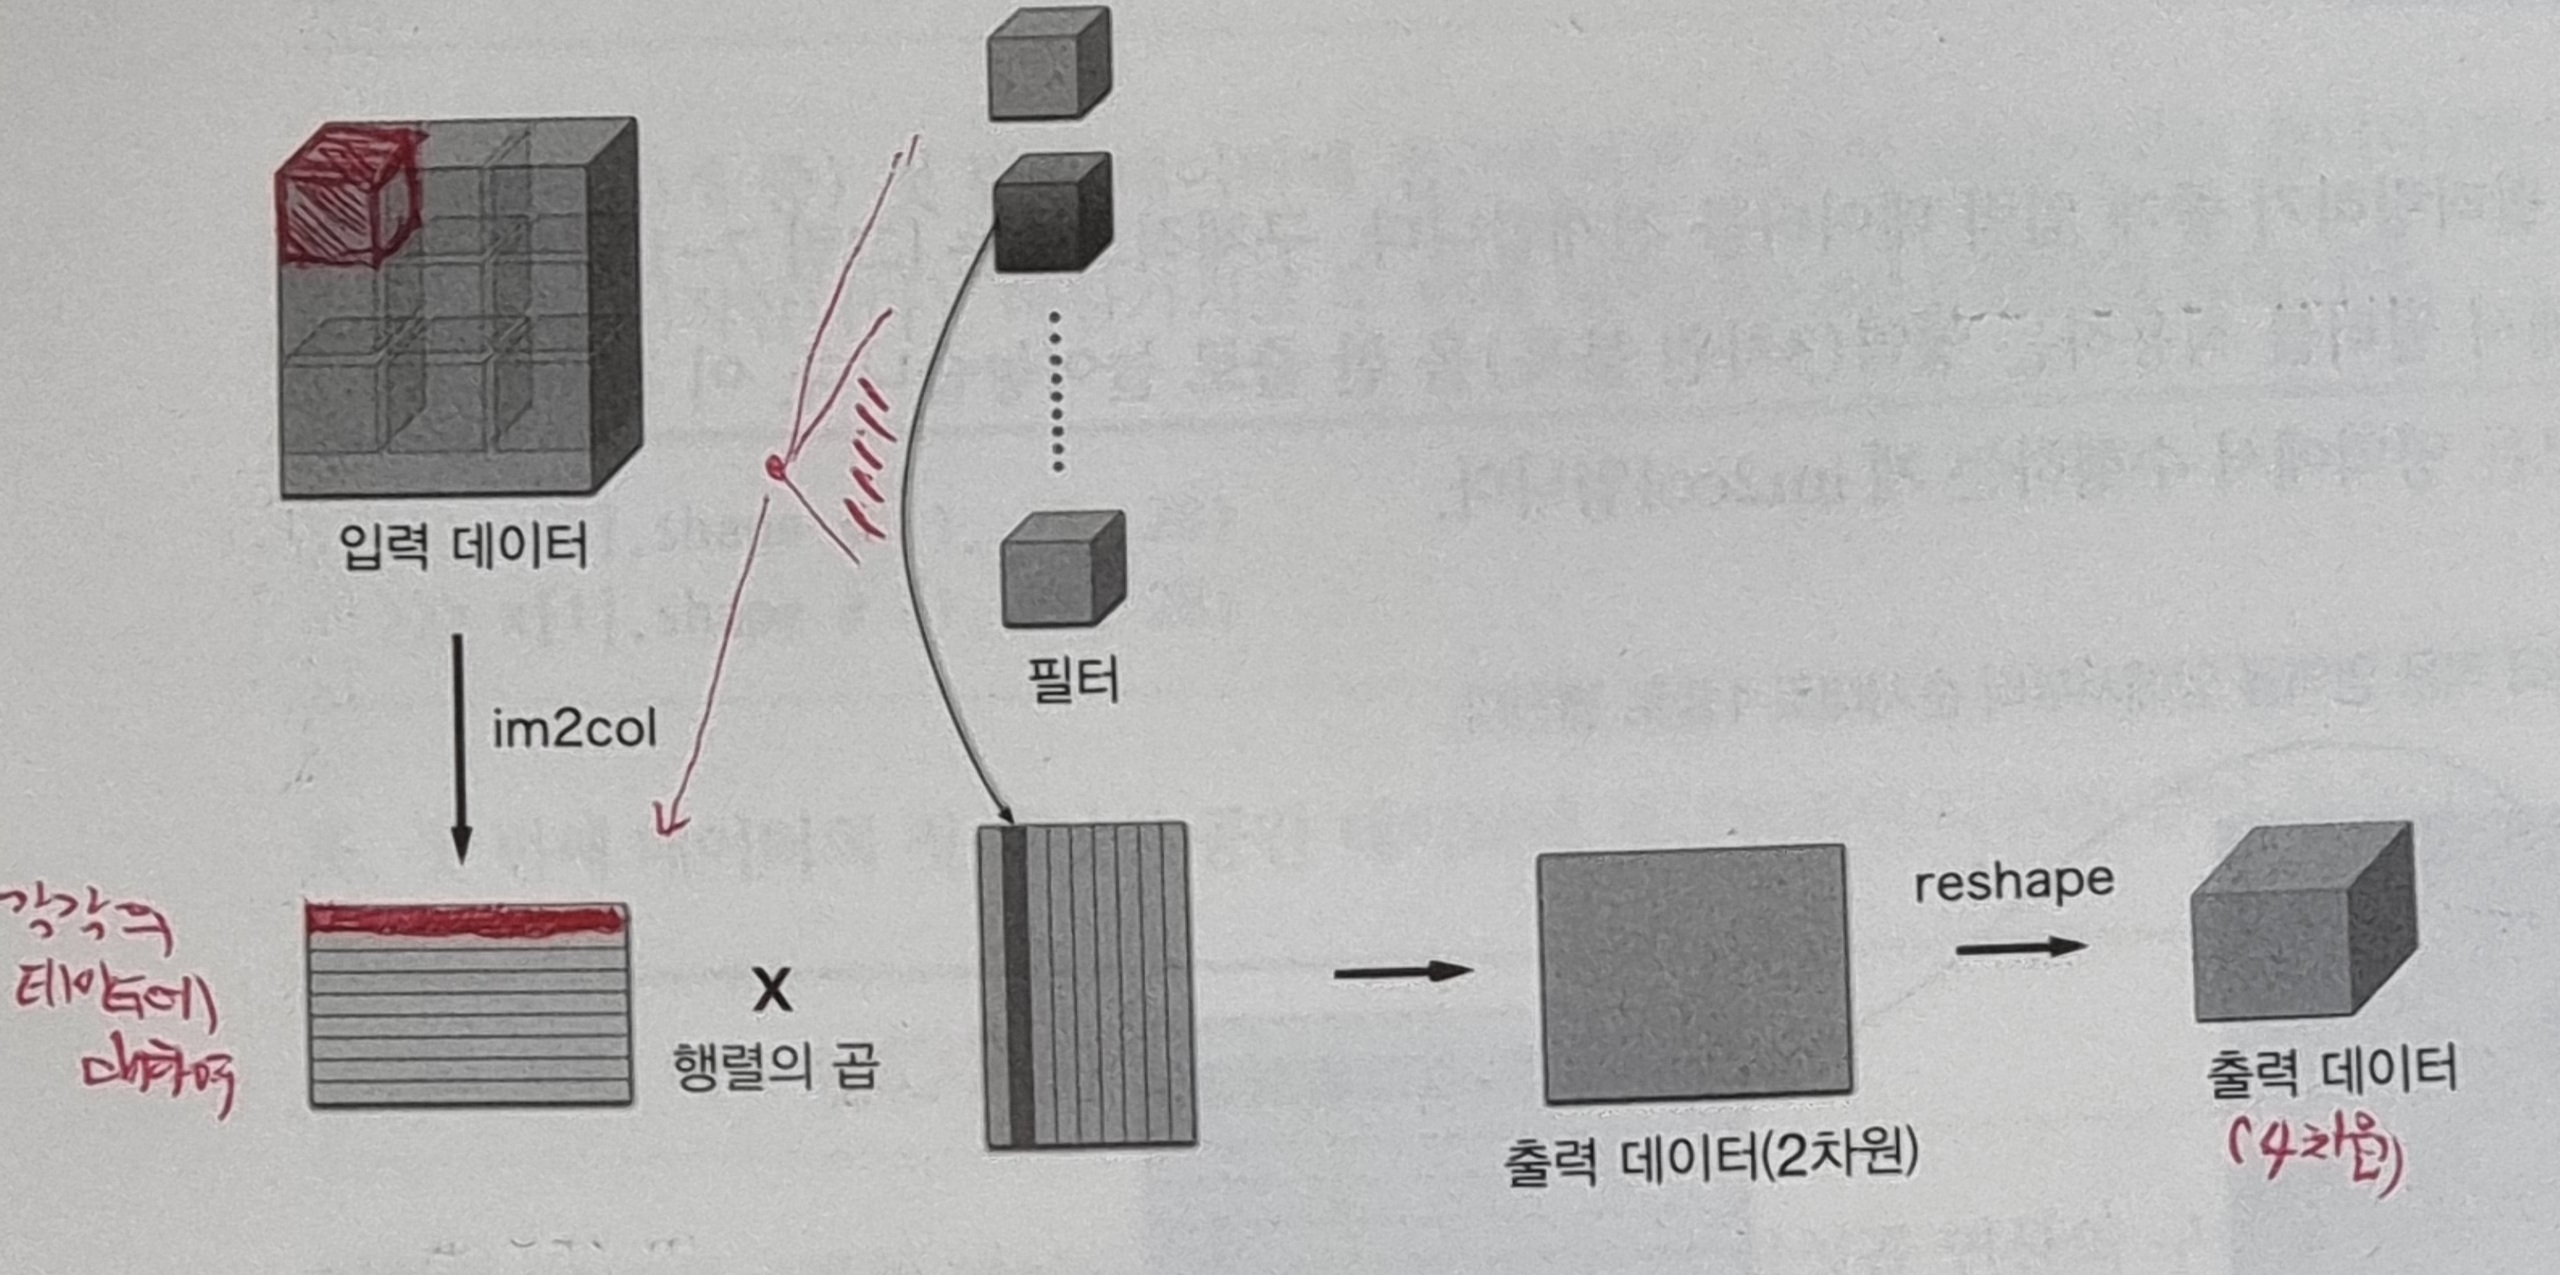

In [5]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
from IPython.display import Image
Image('/gdrive/My Drive/ex3.jpg')


#이처럼

im2col로 4차원 데이터를 2차원 행렬로 표현하게 되면, 각 필터에 대해 **행렬 곱**을 수행하는 "affine" 계층의 논리대로 구현할 수 있다

또한 출력 데이터는 2차원이기 때문에, CNN의 논리대로 4차원 데이터로 다시 바꾸어 놓아야한다. 그래서 다시한번 변형이 필요하다

이 과정이 바로 "합성곱 계층(CNN)의 구현 흐름"이다

#주의

**입력 데이터의 채널 수와 필터의 채널 수는 같아야 한다**

각 채널마다 2차원 수도쿠퍼즐이 있고 이 채널끼리(입력값&필터의) 합성곱하는게 전체 흐름이다

각 데이터는 채널(2차원)의 집합, 즉 3차원이고

최종 입력 데이터(배치기준)는 이러한 데이터(3차원)의 집합, 즉 4차원 인것이다

만약 입력 데이터가 1개, 즉 input이 3차원으로 가정한다면

3차원 필터와 합성곱을 하고 나온 출력 데이터는 2차원(3차원이지만 채널이 1개)이다. 

그래서 출력 데이터의 채널을 여러개로 하고 싶다면 필터의 갯수를 FN개로 설정하는 것이고, 

자연스레 **필터의 차원역시 4차원**이 되는 것이다

#그래서

논리상 각 데이터마다 FN개의 필터를 모두 합성곱을 한다.

각 데이터마다의 출력 결과는 3차원이며(2차원 데이터 FN개)

모든 데이터의 집합(input)의 최종 결과 데이터는 3차원들의 집합, 

즉 **output은 4차원**이 되는 것이다.

그래서 input,필터,ouput 모두 4차원으로 보는 것이 바람직하다

In [8]:
#합성곱 계층의 구현
from util import im2col #위의 과정을 구현한 함수가 여기에 정의되어있다
#im2col(input_data, filter_h, filter_w, stride, pad). 인자에 필터의 정보와 스트라이드,패딩의 크기가 들어감
#2차원 행렬로 나타낼때 필터의 정보와 합성곱 스킬들의 정보가 필요함을 의미
x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1,5,5,stride=1,pad=0)
print(col1.shape)
x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2,5,5,stride=1,pad=0)
print(col2.shape)

(9, 75)
(90, 75)


#위의 결과값이 의미하는 바

"필터"는, 일단 가로*세로로 이루어진 2차원 공간으로 생각하고.

이 2차원 공간의 집합(채널의 개수만큼)으로 3차원 공간이 생기고.

앞 논리로 인한 FN개의 필터로 인해 3차원의 집합, 즉 4차원 공간이 생겼습니다.

**이 모든 논리의 중심은 2차원 필터간의 합성곱 연산입니다.**

그래서 **im2col함수의 인자에 합성곱 연산에 필요한 정보**가 들어간 것입니다

그래서 필터의 가로 세로 크기, 스트라이드 , 패딩의 정보가 들어갔습니다.

실제 col의 shape를 보면

im2col의 결과물(행렬)의 **y축은 데이터의 개수에 비례**했고(스트라이드 겹침 현상 등에 의해 배로 늘어난 모습)

**x축은** 각 데이터마다 수행되는 합성곱을 위하여, 좀 생각해보면 **"각 필터의 전체 원소 수"** 만큼이 들어감을 알 수 있습니다.

(채널수 * 2차원필터의 가로크기 * 2차원필터의 세로 크기)

왜 "전체 필터의 전체 원소 수"가 아니냐는 반문이 있을 수 있지만,

"필터" 주어의 2차원 행렬에서 동일 논리를 써야 하기 때문이라고 생각하겠습니다

(입력도 각 데이터마다 기준을 나누었으니 필터도 각 필터마다로 기준을 나누겠다)